# Assignment 3

## Raksha Pahariya | 2021CSB029

## Task 1

#### Upload & Get Information about the dataset

In [1]:
# Connecting to the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing Pandas and loading the dataset in a pandas dataframe
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/ML_DRIVE/Assign_3/covtype.csv')
train_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)

    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()

    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")

    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())

    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())

    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n", df.describe().transpose())

# Call the function
get_df_info(train_df)


Shape of DataFrame:  (581012, 55)

Columns in DataFrame:  ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']

Data types of columns:
 Ele

#### Consider only two features and three classes and train Logistic Regression 3-class classifier (any three class) to show the training and test area in a 2D plane, using matplotlib.

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml


# Selecting only two features ("Elevation" & "Slope") and filtering three classes for the Cover_Type

df_filtered = train_df[train_df['Cover_Type'].isin([1, 2, 3])]
X = df_filtered[['Elevation', 'Slope']]

y = df_filtered['Cover_Type']

# Dividing in train and test dataset in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Logistic Regression model on the training data

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predict on the test data

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Train a Logistic Regression model on the training data

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Train Accuracy: 0.73
Test Accuracy: 0.73


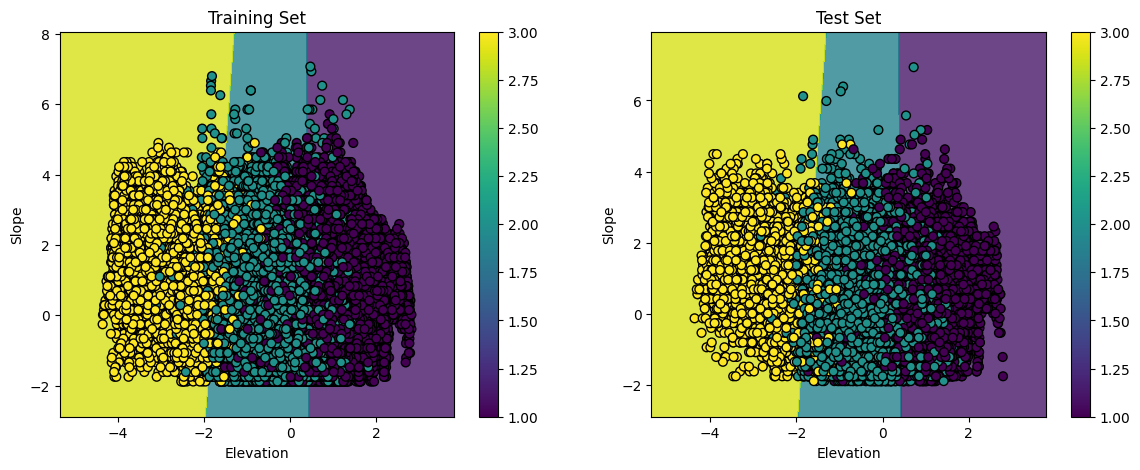

In [6]:
import numpy as np

# Plot the decision boundary and data points

def plot_decision_boundary(X, y, model, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', marker='o')
    ax.set_title(title)
    ax.set_xlabel('Elevation')
    ax.set_ylabel('Slope')
    return scatter

# Create subplots for training and test accuracy plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

scatter1 = plot_decision_boundary(X_train, y_train, model, ax1, 'Training Set')
scatter2 = plot_decision_boundary(X_test, y_test, model, ax2, 'Test Set')

fig.colorbar(scatter1, ax=ax1)
fig.colorbar(scatter2, ax=ax2)
plt.show()

#### Analyze and control the overfitting by varying the inverse of regularization strength parameter (0.1, 0.25, 0.5, 0.75, 0.9) and plot the accuracy graph for the test set.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

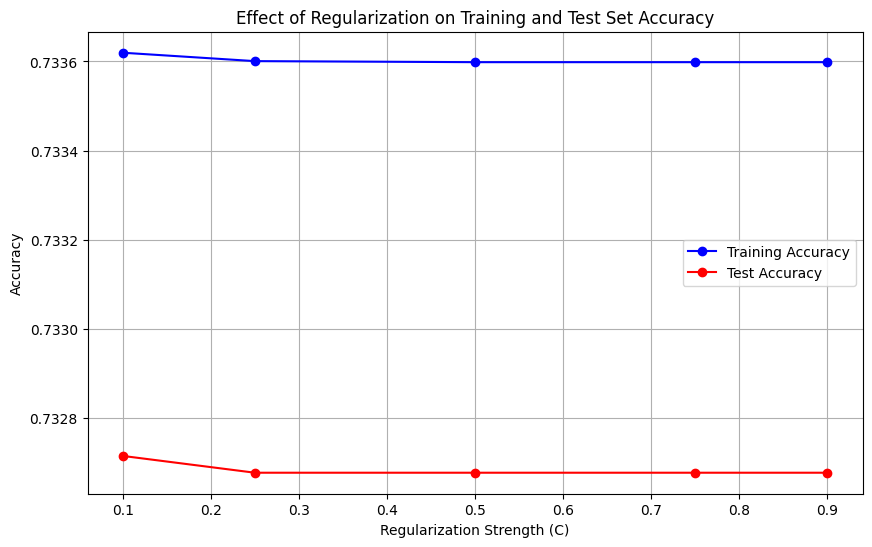

In [7]:
# Varying the inverse of regularization strength (C) values
C_values = [0.1, 0.25, 0.5, 0.75, 0.9]
train_accuracies = []
test_accuracies = []


# Loop through each C value, train the model, and record accuracy
for C in C_values:
    # Train a Logistic Regression model with varying regularization
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=C)
    model.fit(X_train, y_train)

    # Make predictions on the training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy for both training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to respective lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the accuracy for different C values
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Training Accuracy', marker='o', color='blue')
plt.plot(C_values, test_accuracies, label='Test Accuracy', marker='o', color='red')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization on Training and Test Set Accuracy')
plt.legend()
plt.grid(True)
plt.show()

This time let us take the whole dataset, not just 2 features with 3 classes.

**EDIT :** Could not run the whole dataset so taking a slightly bigger set for more detailed training of the model. Changed solver from 'lbfgs' to 'saga' and changed the max_itereation but the model would not fit in the available resources.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

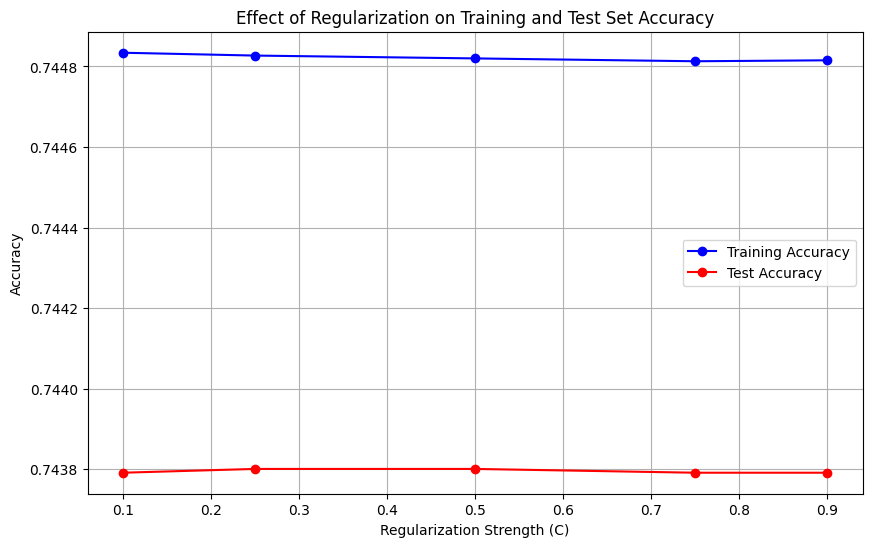

In [8]:
# df_filtered_new = train_df.copy()

df_filtered_new = train_df[train_df['Cover_Type'].isin([1, 2, 3])]
X = df_filtered_new[['Elevation', 'Slope', 'Aspect', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']]
y = df_filtered_new['Cover_Type']


# Dividing in train and test dataset in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Varying the inverse of regularization strength (C) values
C_values = [0.1, 0.25, 0.5, 0.75, 0.9]
train_accuracies = []
test_accuracies = []


# Loop through each C value, train the model, and record accuracy
for C in C_values:
    # Train a Logistic Regression model with varying regularization
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=C)
    model.fit(X_train, y_train)

    # Make predictions on the training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy for both training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to respective lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the accuracy for different C values
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Training Accuracy', marker='o', color='blue')
plt.plot(C_values, test_accuracies, label='Test Accuracy', marker='o', color='red')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization on Training and Test Set Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#### Apply multiclass classification in Support Vector Machine (SVM) using Forest Cover Type dataset.

Could not run the model in a reasonable amount of time.

Edit 1: Made the train set 50%, still it would run in a reasonable amount of time.

Edit 2: Changing Kernel to a linear kernel. Took 35 min to run and obviously the results are very bad.

In [ ]:
from sklearn.svm import SVC

# Select only two features ('Elevation' and 'Slope') and filter for three classes
df_filtered = train_df[train_df['Cover_Type'].isin([1, 2, 3])]
df_filtered = df_filtered[['Elevation', 'Slope', 'Cover_Type']]

X = df_filtered[['Elevation', 'Slope']]
y = df_filtered['Cover_Type']

# Dividing in train and test dataset in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reduce the training data size (e.g., using 50% of the data)
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.4, random_state=42)

# Standardize the features

scaler = StandardScaler()
X_train_small = scaler.fit_transform(X_train_small)

# Train the SVM on the smaller subset
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_small, y_train_small)
# Standardize the features

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Train a Support Vector Classifier (SVC) with an RBF kernel for multiclass classification
# svm_model = SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)
# svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_train_pred = svm_model.predict(X_train_small)
y_test_pred = svm_model.predict(X_test)

# Calculate the accuracy for both the training and test sets
train_accuracy = accuracy_score(y_train_small, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Plot and analyze the confusion matrix for the above applied SVM method.

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plotting the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1, 2, 3])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Multiclass Classification')
plt.show()

NameError: name 'y_test_pred' is not defined

## Task 2





#### Download Titanic Dataset and do the initial preprocessing and train a Decision Tree classifier and vary the maximum depth of the tree to train at least 5 classifiers to analyze the effectiveness.

In [12]:
# Importing Pandas and loading the dataset in a pandas dataframe
import pandas as pd
train_df = pd.read_csv('/content/drive/My Drive/ML_DRIVE/Assign_3/titanic_train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Get Information about the dataset
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)

    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()

    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")

    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())

    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())

    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n", df.describe().transpose())

# Call the function
get_df_info(train_df)



Shape of DataFrame:  (891, 12)

Columns in DataFrame:  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Data types of columns:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  

In [14]:
# Fill missing values in 'Age' with the mean age
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

if 'Embarked' in train_df.columns:
    train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
else:
    print("Column 'Embarked' is missing from the dataset.")



# Fill missing values in 'Embarked' with the most frequent value
# train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' feature
train_df.drop('Cabin', axis=1, inplace=True)


In [15]:
import pandas as pd
# One-hot encode categorical features
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])

# Print the unique columns
print("\n\033[1mUnique columns after one-hot encoding:\033[0m ", train_df.columns.to_list())



Unique columns after one-hot encoding:  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


In [16]:
from sklearn.model_selection import train_test_split

# Select features and target variable
X = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# List of depths to test
depths = [1, 3, 5, 7, 10]

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Depth: {depth}, Accuracy: {accuracy:.2f}")


Depth: 1, Accuracy: 0.78
Depth: 3, Accuracy: 0.80
Depth: 5, Accuracy: 0.80
Depth: 7, Accuracy: 0.81
Depth: 10, Accuracy: 0.79


The results show that increasing the depth initially improves accuracy, but after a certain point, it starts to overfit the data.

A good depth for this dataset seems to be around 5 or 7, as it provides a decent balance between capturing patterns and avoiding overfitting.


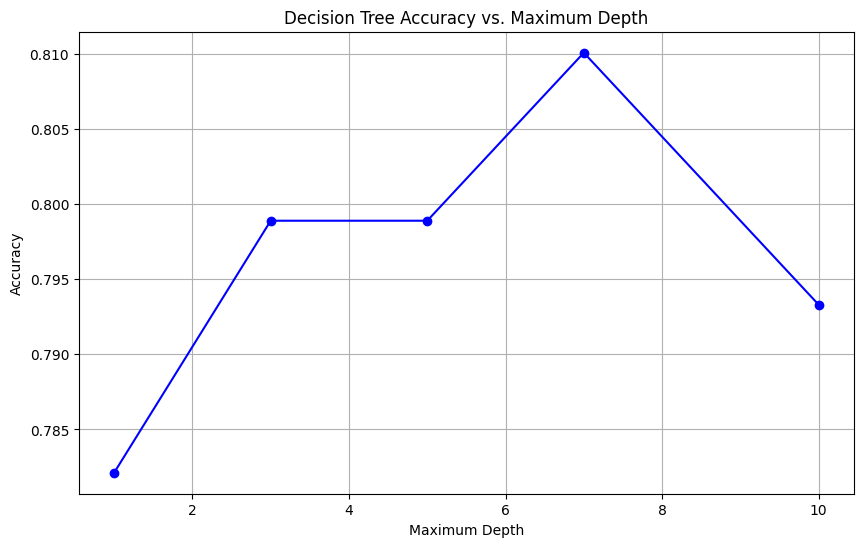

In [18]:
import matplotlib.pyplot as plt
# List of depths to test
depths = [1, 3, 5, 7, 10]
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the accuracy for different depths
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', color='blue')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Maximum Depth')
plt.grid(True)
plt.show()


####  Estimate the average accuracy of the Naïve Bayes Classifier using 5-fold cross-validation using a scikit-learn package in python. Plot the bar graph using matplotlib.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Initialize Naïve Bayes classifier
nb_classifier = GaussianNB()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Calculate average accuracy
average_accuracy = np.mean(cv_scores)
print(f"Average Accuracy: {average_accuracy:.2f}")

Average Accuracy: 0.79


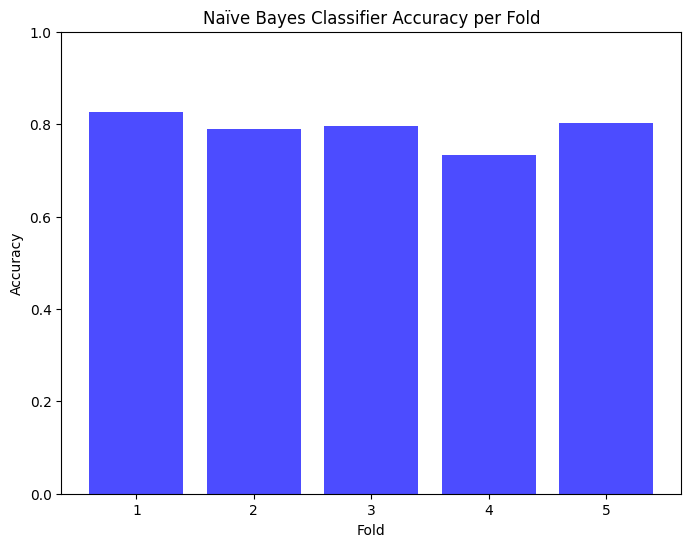

In [20]:
# Plot the accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_scores, color='blue', alpha=0.7)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Naïve Bayes Classifier Accuracy per Fold')
plt.ylim([0, 1])
plt.xticks(range(1, 6))
plt.show()


The Naïve Bayes Classifier shows a consistent accuracy across the folds, indicating that the model is relatively stable and not prone to overfitting.
